<h1> PCA </h1>
    <h3> Import libraries. </h3>

In [32]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
#OS is for navigating directories on the computer
import os


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/nada/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /Users/nada/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


<h3> Using os, import text files from directory. </h3>

In [33]:
textdir = '/Users/nada/Documents/GitHub/Design-and-Development-updated/week11/text_files'
os.chdir(textdir)

<h4> Create a for loop to add an output name to the filename.
    <br> Open the output file, read the text from the file.
    <br> Splikt the text into a list of sentences.
    <br> For each word and each part-of-speech tag that you get.
    <br> When NLTK tokenizes the sentence, If the part-of-speech is noun,
    <br> Write the word to the output file.
</h4>    

In [34]:
for filename in os.listdir(textdir):
    #If the filename ends with .txt...
    if not filename.endswith('-adj.txt'):
        #Create an output name that adds '-nouns' to the filename
        outname = filename.replace('.txt','-adj.txt')
        #Open the file
        with open(filename, 'r', encoding="utf-8") as f:
            #Open the output file
            print(filename)
            with open(outname, 'w') as out:
                #Read the text from the file
                text = f.read()
                #print(text)
                #Split the text into a list of sentences
                sentences = nltk.sent_tokenize(text)
                #print( sentences )
                #For each sentence in the list of sentences...
                for sentence in sentences:
                    #For each word and each part-of-speech tag that you get
                    #When NLTK tokenizes the sentence (splitting words from punctuation, etc.)
                    for word,pos in nltk.pos_tag(nltk.word_tokenize(str(sentence))):
                        #If the part-of-speech is noun
                        #if (pos == 'NN' or pos == 'NNS'):
                        #You can sub in other parts of speech, too
                        #Just comment out the noun code, and uncomment one of these
                        #Adverbs
                        #if (pos == 'RB' or pos == 'RBR' or pos == 'RBS'):
                        #Adjectives
                        if (pos == 'JJ' or pos == 'JJR' or pos == 'JJS'):
                        #Verbs
                        #if (pos == 'VB' or pos == 'VBD' or pos == 'VBG' or pos == 'VBN' or pos == 'VBP' or pos == 'VBZ'):
                            #Write the word (which should be a noun) to the output file
                            out.write(word)
                            #Write a space so the words don't smush together
                            out.write(' ')

7-mdp-39015037691857-1636155613-nouns.txt
0-uc1-c086758171-1636155719-nouns.txt
6-uc1-31822035016773-1636155543-nouns.txt
2-uc1-c066942036-1636155899-nouns.txt
.DS_Store
5-mdp-39015037691857-1636155384.txt
1-mdp-39015032273156-1636155235.txt
9-pur1-32754064850740-1636155478.txt
4-uc1-c066942036-1636155806-nouns.txt
9-pur1-32754064850740-1636155478-nouns.txt
6-uc1-31822035016773-1636155543.txt
8-uc1-31822034405175-1636154922.txt
1-mdp-39015032273156-1636155235-nouns.txt
0-uc1-c086758171-1636155719.txt
3-mdp-39015034887615-1636155317-nouns.txt
4-uc1-c066942036-1636155806.txt
7-mdp-39015037691857-1636155613.txt
5-mdp-39015037691857-1636155384-nouns.txt
8-uc1-31822034405175-1636154922-nouns.txt
2-uc1-c066942036-1636155899.txt
3-mdp-39015034887615-1636155317.txt


<h3> Load the documents and titles into lists.
    <br> Create a for loop to populate the lists with the nouns.
    <br> Convert into lower case and split.
    <br> Extract slices from the text using start and end indeces, and segment count.
 </h3>   

In [35]:
def load_directory(directory, max_length):
    documents, titles = [], []
    for filename in os.scandir(directory):
        #change this to analyze a different component after changing the save above
        if not filename.name.endswith('-adj.txt'):
            continue

        with open(filename.path) as f:
            contents = f.read()
        
        lemmas = contents.lower().split()

        start_idx, end_idx, segm_cnt = 0, max_length, 1
        
        # extract slices from the text:
        #print(len(lemmas), start_idx, end_idx)
        while end_idx < len(lemmas):
            #print(len(lemmas), start_idx, end_idx)
            documents.append(' '.join(lemmas[start_idx:end_idx]))
            title = filename.name.replace('-adj.txt', '')
            titles.append(f"{title}-{segm_cnt}")

            start_idx += max_length
            end_idx += max_length
            segm_cnt += 1

    return documents, titles

<h3> Run the contents through vectorize.</h3>

In [48]:
documents, titles = load_directory(textdir, 10000)
print(len(documents))
import sklearn.feature_extraction.text as text
#print(textdir)

vectorizer = text.CountVectorizer(max_features=30, token_pattern=r"(?u)\b\w+\b")
v_documents = vectorizer.fit_transform(documents).toarray()

print(v_documents.shape)

print(vectorizer.get_feature_names()[:10])

20
(20, 30)
['1', 'adverse', 'available', 'clinical', 'common', 'dose', 'effective', 'first', 'high', 'human']


/Users/nada/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


<h3> Run a 2 word vizualization comparing all texts. </h3>

[Text(0.5, 0, 'adverse'), Text(0, 0.5, 'effective')]

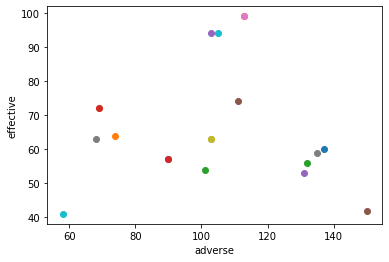

In [49]:
import matplotlib.pyplot as plt
import numpy as np

words = vectorizer.get_feature_names()

titles = np.array(titles)

x = v_documents[:, words.index('adverse')]
y = v_documents[:, words.index('effective')]

fig, ax = plt.subplots()

for title in set(titles):
    ax.scatter(x[titles==title], y[titles==title], label=title)
ax.set(xlabel='adverse', ylabel='effective')
#plt.legend();

<h3> Import sklearn to transform the documents. </h3>

In [50]:
import sklearn.decomposition

pca = sklearn.decomposition.PCA(n_components=2)
documents_proj = pca.fit_transform( v_documents )

print(v_documents.shape)


(20, 30)


<h3> Run a full (PCA) vizualization comparing all texts using the provided PCA boilerplate.</h3>

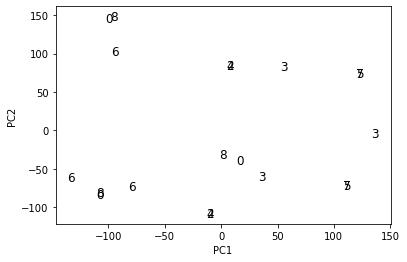

In [51]:
c1, c2 = documents_proj[:, 0], documents_proj[:, 1]

fig, ax = plt.subplots()
ax.scatter(c1, c2, facecolors='none')

for p1, p2, title in zip(c1, c2, titles):

    ax.text(p1, p2, title[0], fontsize=12,
            ha='center', va='center')

ax.set(xlabel='PC1', ylabel='PC2');

<h3> Data Analysis. </h3>
    <p>
    <h4>
     The documents used in the analysis contain information and recommendations on the epidemiology and 
     vaccines preventable diseases over several years. The goal of the analysis is to spot the variation over
     time, and see which documents have more in common regarding the chosen parameters.
     Documents 7 and 3, and documents 2 and 4 for example are similar in content.
     Documents 7 and 3 were published in 1996 and 1993 respectively, meaning there was not much of new
     contents between these 2 years. Documents 2 and 4 were both published in 1999, which explains the 
     confounding data.  
     Documents 0 and 8 have minimum variation. Both documents were published in 2006.
     Documents 3 and 6 are far apart, doc.3 being published in 1993, and doc. 6 in 2011. Throughout the period
     spanning over 18 years, much information on the epidemiology and prevention of vaccine preventable 
     diseases must have changed.
     Finally, it would be nice to use bookeh to create an interactive plot with titles, years, publisher, for 
     example, that appear once we hover over the data points. My attempt to create such a figure failed 
     unfortunately.
</h4>
</p>